# Constrain millisecond pulsar hypothesis for the GeV excess


This tutorial aims to show how the millisecond pulsar (MSP) hypothesis for the GeV excess can be constrained using results from searches for continuous gravitational waves from the Galactic Center (GC).

The GeV excess is a large concentration of gamma rays observed to be emanating from the GC by Fermi-LAT. Its origins are unclear but are thought to be caused by one of two physical phenomenon: (1) WIMP dark matter annihilating in the GC or (2) a large population of MSPs in the GC that cannot be resolved with light.

We focus on constraining the second hypothesis using upper limits on neutron-star deformation size (ellipticity) from searches for continuous waves.

To do this, we first need to compute the probability that we would have detected a signal, which is given by:

\begin{equation}
P_{\rm GW}=\int_{f_{\rm min}}^{f_{\rm max}} P(f) df \int_{\epsilon_{\rm UL}}^{\epsilon_{\rm max}} P(\epsilon) d\epsilon
\end{equation}
where $P(f)$ and $P(\epsilon)$ are probability density functions that describe the probility density distribution (PDFs) of frequencies and ellipticity of the unknown neutron stars in the GC. $P(f)$ is integrated over the frequency range searched $[f_{\rm min},f_{\rm max}]$, ensuring that $f_{\rm min}>120$ Hz (assuming that MSPs rotate with a frequency of at least 60 Hz). $P(\epsilon)$ is integrated from the minimum detectable ellipticity that comes from the gravitational-wave searches up to the maximum ellipicity $\epsilon_{\rm max}$ to which the search is sensitive. $\epsilon_{\rm max}$ is primarily a function of the maximum spin-up $\dot{f}$ that a search decides to look for at each frequency and the z-component of the moment of inertia $I_{\rm zz}$.

After computing $P_{\rm GW}$, we must determine the number of MSPs that could exist in the GC $N_{\rm MSP}$. $N_{\rm MSP}$ is a function of how the GeV excess is modelled: one could consider that less sources are each individually brighter to explain the GeV excess, or more sources are fainter. The model for the GeV excess is called a luminosity function. For example, if one assumes a log-normal luminosity function, $N_{\rm MSP}=N_{\rm MSP}(L_0,\sigma_L)$ is a function of two free parameters $L_0$ and $\sigma_L$. In all cases, if:

\begin{equation}
    N_{\rm MSP}(L_0,\sigma_L,...) P_{\rm GW} > 1
\end{equation}
then the free parameters that give rise to $N_{\rm MSP}$ can be excluded as being responsible for the observed GeV excess.

Thus, our constraints look like exclusion regions in the parameter 2 vs. parameter 1 space.

## Getting Started

Before running this tutorial, ensure you have the `cw_constrain` package installed and properly set up. See the `README.md` for installation instructions.

Or, run in google collab: [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/andrew-l-miller/cw_constrain/blob/main/tutorials/O4a_GeV_excess_tutorial.ipynb)

In [1]:
try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False
    
if IN_COLAB:
    !pip install cw-constrain


### Import necessary packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import constants as const
import pandas as pd
from scipy.stats import gaussian_kde
import matplotlib as mpl
import os
import sys
from cw_constrain.GeV_constrain.gev_constrain import *

In [3]:
## Add the path where the limits are

os.environ["CW_CONSTRAIN_LIMITS_PATH"] = "/Users/andrewmiller/Desktop/O4/limits/"

# Define common parameters

In [4]:
## sdlimfact=1/0.1 = 10, so 1/10^2 energy is going into GWs

dist_kpc=8.0
Izz=1.0e38
plot_flag=0
N=1 ## minimum number of MSPs to be sensitive to
savedir = '/Users/andrewmiller/Desktop/O4/O4a_CW_allsky_isolated/figures/'

# Choose which run and method, which selects upper limits

In [5]:
which_run='O4a'
which_search = 'powerflux'

# Choose which luminosity function

In [6]:
lum_func ='log-norm'

# Choose which ellipticity distribution

In [7]:
which_dist='atnf' # ellipticity spindown limits
which_freq_dist = 'atnf'
msp_min_frot = 60.
sdlimfact=1/(0.05)**(1/2)# the number divided corresponds to the frac of energy going into GWs

# Create exclusion plots for ATNF catalog ellipticity distribution

Pgw:  0.0003567105186875682


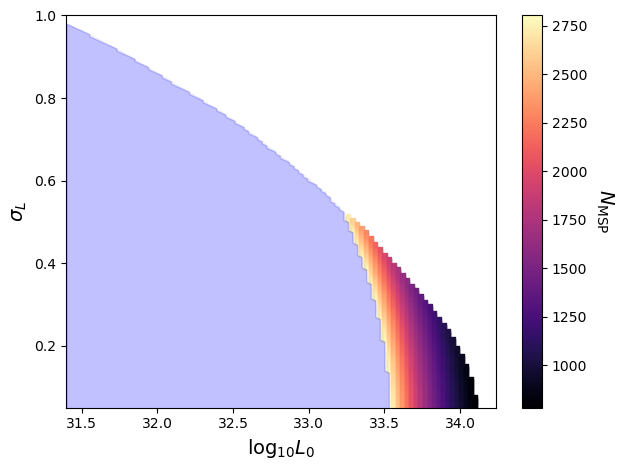

In [9]:
L0,sigmaL,Nmsp,Ngw,Pgw = GeV_excess_get_constraints(which_dist,which_run,which_search,dist_kpc,Izz,plot_flag,sdlimfact,lum_func,msp_min_frot,which_freq_dist)

GeV_plot_exclusions_log_norm(L0,sigmaL,Nmsp,Ngw,N)
plt.tight_layout()
# plt.savefig(savedir+'O4a_exclusion_plot_'+which_dist+'_'+lum_func+'_'+str(sdlimfact)+'_.png',format='png',dpi=400,facecolor='w')


In [ ]:
# # plt.plot(L0,sigmaL,'b.')
# plt.scatter(L0[Ngw<N],sigmaL[Ngw<N],c=Nmsp[Ngw<N],\
#                 cmap='magma',marker='s',s=10)#,norm=mpl.colors.LogNorm())
# cbar=plt.colorbar(label=r'$N_{\rm MSP}$')
# cbar.set_label(label=r'$N_{\rm MSP}$',size=14,rotation=270,labelpad=20)

# plt.plot(L0[Ngw>N],sigmaL[Ngw>N],'k.',alpha=0.1)
# plt.plot(L0[Ngw>2*N],sigmaL[Ngw>2*N],'r.',alpha=0.1)
# plt.plot(L0[Ngw>3*N],sigmaL[Ngw>3*N],'b.',alpha=0.3)

# Create exclusion plots for Log10 ellipticity randomly generated exponential distribution

We consider 100 randomly generated log10 expoential distributions and take the average of the number of detectable GW signals, with a decay paramter $\Lambda=2.1$

In [23]:
which_dist_exp='log10exp' # ellipticity spindown limits
Lambda = 2.1#2.1 for O4a search

Nsim = 100
Nmsp_exp_all = 0
Ngw_exp_all = 0
for n in range(Nsim):
    L0_exp,sigmaL_exp,Nmsp_exp,Ngw_exp,Pgw = GeV_excess_get_constraints(which_dist_exp,which_run,which_search,dist_kpc,Izz,plot_flag,Lambda,lum_func)
    Nmsp_exp_all += Nmsp_exp
    Ngw_exp_all += Ngw_exp

# Have summed above, now divide by Nsim to get the mean
Nmsp_exp_all = Nmsp_exp_all / Nsim
Ngw_exp_all = Ngw_exp_all / Nsim


Pgw:  1.0664095247843581e-07
Pgw:  5.9506372766205655e-05
Pgw:  4.3670024994037093e-05
Pgw:  4.6766740173938057e-05
Pgw:  8.95213551423196e-05
Pgw:  7.793702956568768e-05
Pgw:  6.339368070587676e-05
Pgw:  0.00014307589525389721
Pgw:  9.861979669284466e-05
Pgw:  4.720136747764657e-05
Pgw:  4.695497045968815e-05
Pgw:  2.193945283796036e-05
Pgw:  5.897552250353726e-05
Pgw:  8.115158755983441e-05
Pgw:  2.4500028008681924e-05
Pgw:  9.43922810142778e-05
Pgw:  0.00010173891430641939
Pgw:  0.00010767287544088018
Pgw:  2.1728997146488544e-05
Pgw:  3.7692306444089204e-05
Pgw:  4.713258722266329e-05
Pgw:  8.66749927225048e-05
Pgw:  3.3075786087209904e-06
Pgw:  4.5436190702772364e-05
Pgw:  4.518378507707052e-05
Pgw:  3.697757944812432e-05
Pgw:  6.025394545760322e-05
Pgw:  3.7829266134960064e-05
Pgw:  8.536372020818297e-05
Pgw:  5.46499371341604e-05
Pgw:  3.8510175019365193e-05
Pgw:  8.285271568460914e-05
Pgw:  6.57038339926916e-05
Pgw:  8.537481001278497e-05
Pgw:  5.0699551964437905e-05
Pgw:  4.93

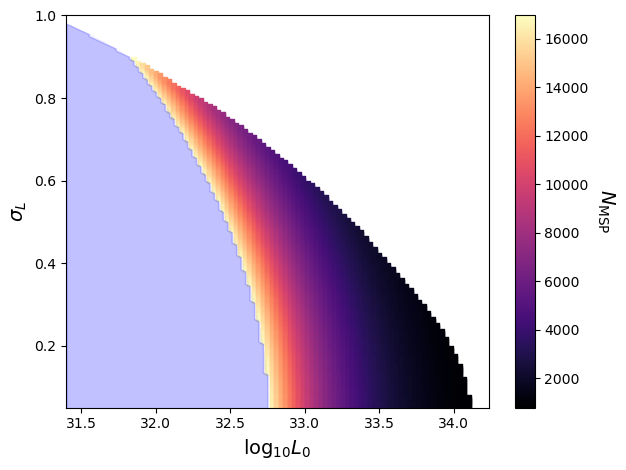

In [24]:
GeV_plot_exclusions_log_norm(L0_exp,sigmaL_exp,Nmsp_exp_all,Ngw_exp_all,N)
plt.tight_layout()
# plt.savefig(savedir+'O4a_exclusion_plot_'+which_dist+'_'+lum_func_agamma+'_'+str(Lambda)+'_.png',format='png',dpi=400,facecolor='w')

### Create a plot of one of the log10 ellipticity distributions used to get a feel for what it looks like

In [25]:
Lambda = 2.1


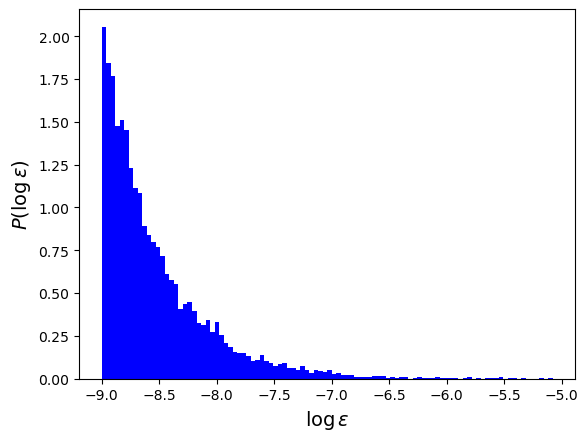

In [26]:
log_ellip_dist = gen_log10_exp_dist(1e-9, 1e-5, Lambda)
plt.hist(log_ellip_dist, bins=100,color='b',density=True)
plt.xlabel(r'$\log\epsilon$',size=14)
plt.ylabel(r'$P(\log \epsilon)$',size=14)
# plt.savefig(savedir+'ellip_pdf.pdf',format='pdf', bbox_inches='tight')
plt.show() 

# Exclusion plots for other luminosity functions

### O4a Powerflux, a-gamma lum func, atnf ellip dist

In [ ]:
### a-gamma lum func
lum_func_agamma = 'a-gamma'

agamma,etamed,Nmsp_agamma,Ngw_agamma,Pgw = GeV_excess_get_constraints(which_dist,which_run,which_search,dist_kpc,Izz,plot_flag,sdlimfact,lum_func_agamma)

GeV_plot_exclusions_gammas(agamma,etamed,Nmsp_agamma,Ngw_agamma,N)
plt.ylabel(r'log$_{10}\eta_{\rm med}$',size=14)
plt.xlabel(r'$a_\gamma$',size=14);
plt.tight_layout()
# plt.savefig(savedir+'O4a_exclusion_plot_'+which_dist+'_'+lum_func_agamma+'_'+str(sdlimfact)+'_.png',format='png',dpi=400,facecolor='w')

### O4a Powerflux, b-gamma lum func, atnf ellip dist

In [ ]:
### b-gamma lum func
lum_func_bgamma = 'b-gamma'

bgamma,etamed_b,Nmsp_bgamma,Ngw_bgamma,Pgw = GeV_excess_get_constraints(which_dist,which_run,which_search,dist_kpc,Izz,plot_flag,sdlimfact,lum_func_bgamma)


GeV_plot_exclusions_gammas(bgamma,etamed_b,Nmsp_bgamma,Ngw_bgamma,N)
plt.ylabel(r'log$_{10}\eta_{\rm med}$',size=14)
plt.xlabel(r'$b_\gamma$',size=14)
plt.tight_layout()
# plt.savefig(savedir+'O4a_exclusion_plot_'+which_dist+'_'+lum_func_bgamma+'_'+str(sdlimfact)+'_.png',format='png',dpi=400,facecolor='w')

### O4a Powerflux, d-gamma lum func, atnf ellip dist

In [ ]:
### d-gamma lum func
lum_func_dgamma = 'd-gamma'

dgamma,etamed_d,Nmsp_dgamma,Ngw_dgamma,Pgw = GeV_excess_get_constraints(which_dist,which_run,which_search,dist_kpc,Izz,plot_flag,sdlimfact,lum_func_dgamma)


GeV_plot_exclusions_gammas(dgamma,etamed_d,Nmsp_dgamma,Ngw_dgamma,N)
plt.ylabel(r'log$_{10}\eta_{\rm med}$',size=14)
plt.xlabel(r'$d_\gamma$',size=14)
plt.tight_layout()
# plt.savefig(savedir+'O4a_exclusion_plot_'+which_dist+'_'+lum_func_dgamma+'_'+str(sdlimfact)+'_.png',format='png',dpi=400,facecolor='w')

# Exclude your own luminosity function

We have added the functionality for users to input their own luminosity functions to obtain constraints on their parameters.

    User-supplied files must be placed in: `data/lum_funcs/`.

    File format:
        - Space- or tab-delimited.
        - No header.
        - 3 columns:
            Column 0: L0 (base luminosity)
            Column 1: sigmaL (log-width or dispersion)
            Column 2: log10(Nmsp) — number of MSPs in log scale

    Example file contents:
        0.01  0.80  2.3010
        0.10  0.55  2.0000
        ...
        

The user needs only to load their luminosity function, which should predict a number of millisecond pulsars $N_{\rm MSP}$ as a function of two model parameters, and multiply that $P_{\rm GW}$ to obtain the number of detectable GW signals in a given observing run for a particular set of upper limits, assuming ellipticity and frequency distributions.

If:

\begin{equation}
N_{\rm GW}=N_{\rm MSP}(L_0,\sigma_L)P_{\rm GW} > 1
\end{equation}

then $L_0$ and $\sigma_L$ can be excluded as explaining the GeV excess
        
 

In [ ]:
def constrain_your_lum_func(lum_func_fname,Pgw):
    """
    User-implemented function to constrain your chosen luminosity functino.

    Parameters
    ----------
    lum_func_filename : str
        One of the predefined models: 'log-norm', 'a-gamma', 'b-gamma', 'd-gamma',
        or a custom filename placed in `data/lum_funcs/`.
    Pgw: number
        The probabilily of detecting GWs from non-axisymmetric rotating neutron stars, assuming particular
        frequency and ellipticity distributions, and using upper limits from a particular search on real data.
    Returns
    -------
    Ngw : float
        The effective PBH fraction corresponding to the given merger rate density and mass fractions.

    Notes
    -----
    
    Some code that could work for you:
    -----
    var1,var2,Nmsp = load_luminosity_function(lum_func_filename)
    Ngw = Nmsp * Pgw
    return var1, var2, Ngw
    
    """
    raise NotImplementedError("You must implement this function based on your luminosity function model.")

    


# Use your own ellipticity or frequency probability density function

    Notes
    -----
    User-supplied ellipticity files must be placed in: `data/ellipticity_distributions/`.
    
    User-supplied frequency files must be placed in: `data/frequency_distributions/`.

    File format:
        - Space- or tab-delimited.
        - No header.
        - 1 column:
            Column 0: ellipticity

    Example file contents:
        1.0e-7 
        1.1e-7 
        ...
    Or
        25
        25.1
        ...
        
    Example filename: atnf_ellip_1perc_1e38_.txt  ; atnf_freq_ex.txt

In [ ]:
def constrain_with_your_ellip_freq_distribution_funcs(ellip_dist,freq_dist):
    """
    User-implemented function to use a custom-designed ellipticity and/or frequency PDF.

    
    Some code that could work for you:
    -----
    L0,sigmaL,Nmsp,Ngw,Pgw = GeV_excess_get_constraints(ellip_dist='atnf_ellip_1perc_1e38_.txt',freq_dist='atnf_freq_ex.txt',lum_func='log_norm')
    
    """
    raise NotImplementedError("You must implement this function based on your ellipticity and/or frequency PDFs.")

    


In [ ]:
%reset